In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/train.csv'

In [4]:
data_test = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/test.csv'

In [5]:
dftrain = pd.read_csv(data)

In [6]:
dftrain.shape

(20216100, 4)

In [8]:
dftest = pd.read_csv(data_test)

In [9]:
df = pd.concat((dftrain,dftest),sort=False)

In [10]:
df.head()

,building_id,meter,timestamp,meter_reading,row_id
0,0,0,2016-01-01 00:00:00,0.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,NaN


In [11]:
df.drop(['row_id'],axis = 1,inplace=True)

In [12]:
df.shape

(61913700, 4)

In [13]:
df.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [14]:
df.building_id.max()

1448

In [13]:
df['building_id']=df.building_id.astype('int16')

In [16]:
df.dtypes

building_id        int16
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [17]:
df.meter.max()

3

In [14]:
df['meter']=df.meter.astype('int8')

In [19]:
df.dtypes

building_id        int16
meter               int8
timestamp         object
meter_reading    float64
dtype: object

In [15]:
df['meter_reading']=np.log1p(df['meter_reading'])

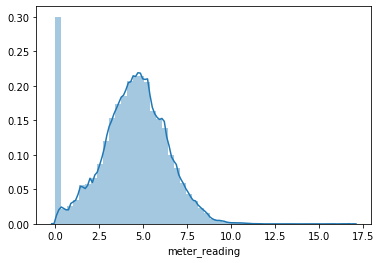

In [17]:
sns.distplot(df['meter_reading'][:20216100])

In [18]:
df = df[df['meter_reading']<10]

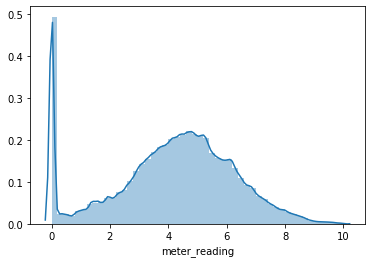

In [19]:
sns.distplot(df['meter_reading'][:20216100])

In [20]:
train = df[:20216100]
test = df[20216100:]

In [21]:
data1 = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/building_metadata.csv'

In [22]:
dfmeta = pd.read_csv(data1)

In [23]:
dfmeta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [24]:
dfmeta.shape

(1449, 6)

In [25]:
dfmeta.dtypes

site_id          int64
building_id      int64
primary_use     object
square_feet      int64
year_built     float64
floor_count    float64
dtype: object

In [26]:
dfmeta.floor_count.isnull().sum()

1094

In [24]:
dfmeta = dfmeta.drop('floor_count', axis=1)

In [28]:
dfmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.7+ KB


In [29]:
dfmeta['primary_use'].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [30]:
dfmeta.year_built.describe()

count     675.000000
mean     1967.957037
std        31.054030
min      1900.000000
25%      1949.000000
50%      1970.000000
75%      1995.000000
max      2017.000000
Name: year_built, dtype: float64

In [31]:
dfmeta.groupby('primary_use')['year_built'].mean()

primary_use
Education                        1962.579755
Entertainment/public assembly    1970.904110
Food sales and service           2012.000000
Healthcare                       1982.250000
Lodging/residential              1973.282353
Manufacturing/industrial         1957.666667
Office                           1972.894118
Other                            1981.500000
Parking                          1998.500000
Public services                  1964.333333
Religious worship                1979.000000
Retail                           1997.571429
Services                                 NaN
Technology/science               1939.000000
Utility                          1976.333333
Warehouse/storage                1983.400000
Name: year_built, dtype: float64

In [32]:
dfmeta.groupby('primary_use')['year_built'].median()

primary_use
Education                        1966.0
Entertainment/public assembly    1976.0
Food sales and service           2012.0
Healthcare                       2000.0
Lodging/residential              1975.0
Manufacturing/industrial         1969.0
Office                           1976.0
Other                            1980.0
Parking                          2003.0
Public services                  1968.0
Religious worship                1979.0
Retail                           1996.0
Services                            NaN
Technology/science               1942.0
Utility                          1990.0
Warehouse/storage                1979.0
Name: year_built, dtype: float64

In [25]:
dfmeta.loc[dfmeta.year_built.isnull(), 'year_built'] = dfmeta.groupby('primary_use').year_built.transform('median')

In [34]:
dfmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     1439 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.7+ KB


In [35]:
dfmeta[dfmeta.year_built.isnull()==True]

,site_id,building_id,primary_use,square_feet,year_built
892,9,892,Services,481999,NaN
944,9,944,Services,389641,NaN
970,9,970,Services,346056,NaN
982,9,982,Services,373416,NaN
984,9,984,Services,214252,NaN
1115,13,1115,Services,42028,NaN
1116,13,1116,Services,11681,NaN
1118,13,1118,Services,26926,NaN
1120,13,1120,Services,70040,NaN
1197,13,1197,Services,50552,NaN


In [26]:
dfmeta = dfmeta.fillna(2000)

In [37]:
dfmeta[dfmeta.primary_use=='Services']

,site_id,building_id,primary_use,square_feet,year_built
892,9,892,Services,481999,2000.0
944,9,944,Services,389641,2000.0
970,9,970,Services,346056,2000.0
982,9,982,Services,373416,2000.0
984,9,984,Services,214252,2000.0
1115,13,1115,Services,42028,2000.0
1116,13,1116,Services,11681,2000.0
1118,13,1118,Services,26926,2000.0
1120,13,1120,Services,70040,2000.0
1197,13,1197,Services,50552,2000.0


In [27]:
dfmeta['year_built'] = dfmeta['year_built'].astype('category')

[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

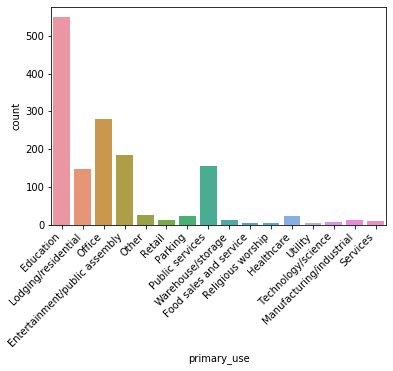

In [39]:
chart = sns.countplot(dfmeta.primary_use)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment = 'right')

In [28]:
dfencode = pd.get_dummies(dfmeta, columns = ['primary_use'], prefix = ['primary'])

In [41]:
dfencode.isnull().sum()

site_id                                  0
building_id                              0
square_feet                              0
year_built                               0
primary_Education                        0
primary_Entertainment/public assembly    0
primary_Food sales and service           0
primary_Healthcare                       0
primary_Lodging/residential              0
primary_Manufacturing/industrial         0
primary_Office                           0
primary_Other                            0
primary_Parking                          0
primary_Public services                  0
primary_Religious worship                0
primary_Retail                           0
primary_Services                         0
primary_Technology/science               0
primary_Utility                          0
primary_Warehouse/storage                0
dtype: int64

In [42]:
dfencode.square_feet.describe()

count      1449.000000
mean      92111.776398
std      110769.950997
min         283.000000
25%       23012.000000
50%       57673.000000
75%      115676.000000
max      875000.000000
Name: square_feet, dtype: float64

In [43]:
dfencode.square_feet.isnull().sum()

0

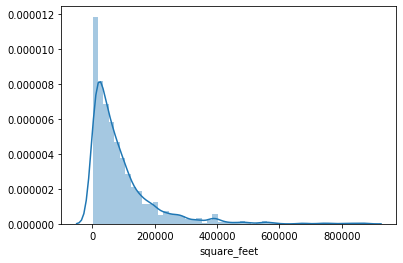

In [44]:
sns.distplot(dfencode.square_feet)

# Standardizing square_feet

In [47]:
from sklearn.preprocessing import StandardScaler

In [29]:
dfencode['square_feet'] = (dfencode['square_feet']-dfencode['square_feet'].mean())/dfencode['square_feet'].std()

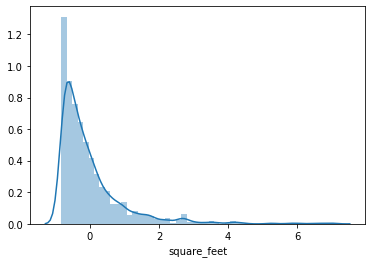

In [46]:
sns.distplot(dfencode.square_feet)

In [30]:
dfencode = dfencode[dfencode.square_feet<4]

# Normalize (Optional)

In [50]:
dfencode['square_feet'] = (dfencode['square_feet'] - dfencode['square_feet'].min())/(dfencode['square_feet'].max()-dfencode['square_feet'].min())

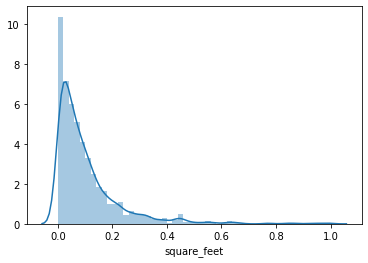

In [51]:
sns.distplot(dfencode.square_feet)

# Continue

In [50]:
weatherdata = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/weather_train.csv'

In [51]:
dfw = pd.read_csv(weatherdata)

In [52]:
dfw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [53]:
dfw.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [54]:
dfw.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [55]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


# precip_depth_1_hr

In [56]:
dfw.precip_depth_1_hr.value_counts()

 0.0      77910
-1.0       5780
 3.0       1469
 5.0        720
 2.0        517
 8.0        447
 10.0       369
 13.0       264
 15.0       194
 18.0       167
 20.0       127
 7.0        103
 6.0         90
 23.0        80
 25.0        75
 33.0        73
 28.0        70
 4.0         68
 30.0        68
 38.0        50
 36.0        47
 43.0        39
 11.0        38
 41.0        38
 9.0         36
 12.0        36
 46.0        32
 17.0        29
 53.0        25
 48.0        20
          ...  
 343.0        2
 164.0        2
 201.0        2
 150.0        2
 217.0        2
 163.0        2
 47.0         2
 236.0        2
 162.0        2
 42.0         2
 310.0        2
 221.0        2
 103.0        2
 105.0        2
 198.0        2
 152.0        2
 241.0        2
 340.0        2
 142.0        2
 196.0        2
 107.0        2
 211.0        1
 78.0         1
 140.0        1
 147.0        1
 175.0        1
 73.0         1
 333.0        1
 109.0        1
 180.0        1
Name: precip_depth_1_hr,

In [57]:
dfw.groupby('timestamp')['precip_depth_1_hr'].mean()

timestamp
2016-01-01 00:00:00         NaN
2016-01-01 01:00:00   -0.300000
2016-01-01 02:00:00   -0.100000
2016-01-01 03:00:00   -0.100000
2016-01-01 04:00:00   -0.200000
2016-01-01 05:00:00    0.000000
2016-01-01 06:00:00   -0.200000
2016-01-01 07:00:00   -0.100000
2016-01-01 08:00:00    0.833333
2016-01-01 09:00:00   -0.100000
2016-01-01 10:00:00    0.666667
2016-01-01 11:00:00   -0.100000
2016-01-01 12:00:00    0.250000
2016-01-01 13:00:00    0.000000
2016-01-01 14:00:00    0.000000
2016-01-01 15:00:00    0.000000
2016-01-01 16:00:00    0.000000
2016-01-01 17:00:00    0.000000
2016-01-01 18:00:00    0.500000
2016-01-01 19:00:00    0.000000
2016-01-01 20:00:00    0.000000
2016-01-01 21:00:00    0.000000
2016-01-01 22:00:00    0.000000
2016-01-01 23:00:00    0.000000
2016-01-02 00:00:00   -0.200000
2016-01-02 01:00:00    0.000000
2016-01-02 02:00:00    0.000000
2016-01-02 03:00:00    0.000000
2016-01-02 04:00:00    0.000000
2016-01-02 05:00:00    0.000000
                         ...  

In [58]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'ffill')

In [59]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'bfill')

In [60]:
dfw.tail(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,-1.0,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,-1.0,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,-1.0,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,-1.0,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [61]:
dfencode.head()

,site_id,building_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,primary_Lodging/residential,primary_Manufacturing/industrial,primary_Office,primary_Other,primary_Parking,primary_Public services,primary_Religious worship,primary_Retail,primary_Services,primary_Technology/science,primary_Utility,primary_Warehouse/storage
0,0,0,-0.764465,2008.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,-0.807004,2004.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,-0.783026,1991.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,-0.617738,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0.221136,1975.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
dfw['cloud_coverage'] = dfw['cloud_coverage'].fillna(method = 'ffill')

In [63]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        139773 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     139773 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


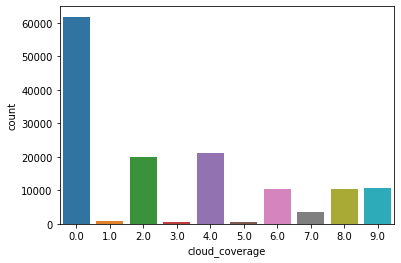

In [64]:
sns.countplot(dfw.cloud_coverage)

# All the missing values

In [65]:
dfw.fillna(method='ffill', inplace=True)

In [66]:
dfw.fillna(method='bfill', inplace=True)

In [67]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139773 non-null float64
cloud_coverage        139773 non-null float64
dew_temperature       139773 non-null float64
precip_depth_1_hr     139773 non-null float64
sea_level_pressure    139773 non-null float64
wind_direction        139773 non-null float64
wind_speed            139773 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


# Joining all three tables

In [68]:
dfencode.shape

(1432, 20)

In [69]:
dfw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,6.0,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [70]:
len(dfw['site_id'].value_counts().sort_values())

16

In [71]:
dfw.shape

(139773, 9)

In [72]:
dfencodew = pd.merge(train,dfencode,on=['building_id'])

In [73]:
dfencodew.shape

(19911174, 23)

In [74]:
dfencodew.head()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,...,primary_Office,primary_Other,primary_Parking,primary_Public services,primary_Religious worship,primary_Retail,primary_Services,primary_Technology/science,primary_Utility,primary_Warehouse/storage
0,0,0,2016-01-01 00:00:00,0.0,0,-0.764465,2008.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2016-01-01 01:00:00,0.0,0,-0.764465,2008.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2016-01-01 02:00:00,0.0,0,-0.764465,2008.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2016-01-01 03:00:00,0.0,0,-0.764465,2008.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2016-01-01 04:00:00,0.0,0,-0.764465,2008.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
len(dfencodew['site_id'].value_counts())

16

In [76]:
dfencodew.isnull().sum()

building_id                              0
meter                                    0
timestamp                                0
meter_reading                            0
site_id                                  0
square_feet                              0
year_built                               0
primary_Education                        0
primary_Entertainment/public assembly    0
primary_Food sales and service           0
primary_Healthcare                       0
primary_Lodging/residential              0
primary_Manufacturing/industrial         0
primary_Office                           0
primary_Other                            0
primary_Parking                          0
primary_Public services                  0
primary_Religious worship                0
primary_Retail                           0
primary_Services                         0
primary_Technology/science               0
primary_Utility                          0
primary_Warehouse/storage                0
dtype: int6

In [77]:
dtrain = pd.merge(dfencodew,dfw,on=['site_id','timestamp'], how='inner')

In [78]:
dtrain.shape

(19821757, 30)

In [79]:
dtrain.isnull().sum()

building_id                              0
meter                                    0
timestamp                                0
meter_reading                            0
site_id                                  0
square_feet                              0
year_built                               0
primary_Education                        0
primary_Entertainment/public assembly    0
primary_Food sales and service           0
primary_Healthcare                       0
primary_Lodging/residential              0
primary_Manufacturing/industrial         0
primary_Office                           0
primary_Other                            0
primary_Parking                          0
primary_Public services                  0
primary_Religious worship                0
primary_Retail                           0
primary_Services                         0
primary_Technology/science               0
primary_Utility                          0
primary_Warehouse/storage                0
air_tempera

In [80]:
dtrain.tail()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,...,primary_Technology/science,primary_Utility,primary_Warehouse/storage,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
19821752,1400,1,2016-03-24 12:00:00,15.3753,15,-0.64046,1928.0,0,0,0,...,0,0,0,1.7,9.0,1.7,-1.0,1016.8,0.0,0.0
19821753,1400,1,2016-03-24 13:00:00,25.0848,15,-0.64046,1928.0,0,0,0,...,0,0,0,2.8,9.0,2.2,-1.0,1016.6,320.0,1.5
19821754,1400,1,2016-03-24 14:00:00,32.3439,15,-0.64046,1928.0,0,0,0,...,0,0,0,5.6,9.0,4.4,-1.0,1015.2,110.0,2.1
19821755,1400,1,2016-03-24 15:00:00,24.2214,15,-0.64046,1928.0,0,0,0,...,0,0,0,11.1,9.0,4.4,-1.0,1013.9,150.0,5.1
19821756,1400,1,2016-03-24 16:00:00,16.3553,15,-0.64046,1928.0,0,0,0,...,0,0,0,15.0,4.0,4.4,-1.0,1012.0,160.0,8.2


In [81]:
dtrain.drop('timestamp', axis=1, inplace=True)

In [82]:
dtrain.head()

,building_id,meter,meter_reading,site_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,...,primary_Technology/science,primary_Utility,primary_Warehouse/storage,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0.0,0,-0.764465,2008.0,1,0,0,0,...,0,0,0,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,1,0,0.0,0,-0.807004,2004.0,1,0,0,0,...,0,0,0,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
2,2,0,0.0,0,-0.783026,1991.0,1,0,0,0,...,0,0,0,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
3,3,0,0.0,0,-0.617738,2002.0,1,0,0,0,...,0,0,0,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
4,4,0,0.0,0,0.221136,1975.0,1,0,0,0,...,0,0,0,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0


In [83]:
dtrain.tail()

,building_id,meter,meter_reading,site_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,...,primary_Technology/science,primary_Utility,primary_Warehouse/storage,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
19821752,1400,1,15.3753,15,-0.64046,1928.0,0,0,0,0,...,0,0,0,1.7,9.0,1.7,-1.0,1016.8,0.0,0.0
19821753,1400,1,25.0848,15,-0.64046,1928.0,0,0,0,0,...,0,0,0,2.8,9.0,2.2,-1.0,1016.6,320.0,1.5
19821754,1400,1,32.3439,15,-0.64046,1928.0,0,0,0,0,...,0,0,0,5.6,9.0,4.4,-1.0,1015.2,110.0,2.1
19821755,1400,1,24.2214,15,-0.64046,1928.0,0,0,0,0,...,0,0,0,11.1,9.0,4.4,-1.0,1013.9,150.0,5.1
19821756,1400,1,16.3553,15,-0.64046,1928.0,0,0,0,0,...,0,0,0,15.0,4.0,4.4,-1.0,1012.0,160.0,8.2


In [84]:
dtrain.shape

(19821757, 29)

In [85]:
target = dtrain['meter_reading']

In [86]:
dtrain.drop('meter_reading',axis=1,inplace=True)

In [87]:
target.shape

(19821757,)

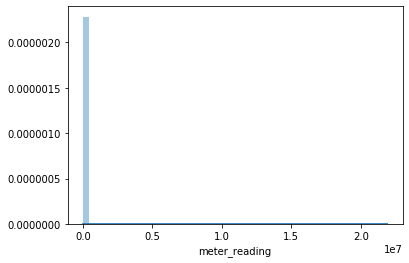

In [88]:
sns.distplot(target)

In [89]:
logtarget = np.log1p(target)

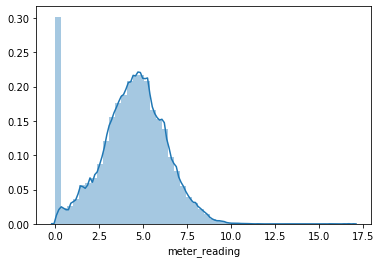

In [90]:
sns.distplot(logtarget)

# Modeling

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error as mse

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(dtrain,logtarget, test_size=0.3, random_state=123)

In [94]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [95]:
xtrain.shape

(13875229, 28)

In [96]:
ytrain.value_counts()

0.000000    1292537
1.368818      16331
3.044522      16267
3.627004      15500
2.281576      15331
3.234749      14971
1.925912      14786
3.433987      14636
2.397895      14575
4.127134      14437
3.542408      14009
3.258097      13636
1.609438      13414
3.218876      13156
3.106826      13110
3.348148      13076
2.944439      12338
3.449988      11929
4.615121      11559
1.945910      11478
3.465736      11137
3.610918      10932
3.295837      10896
3.332205      10880
3.091042      10825
3.367296      10702
1.098612      10679
3.704999      10597
2.543396      10557
3.401197      10452
             ...   
4.442874          1
3.483214          1
6.229623          1
6.055106          1
6.665550          1
8.437966          1
5.976536          1
5.749084          1
5.613314          1
6.453863          1
4.614857          1
2.820343          1
3.361808          1
5.925976          1
4.438260          1
6.353033          1
3.950159          1
3.724485          1
6.577913          1


In [97]:
rf = RandomForestRegressor(n_estimators=1000)

In [98]:
model = rf.fit(xtrain,ytrain)

In [99]:
predicrrf = model.predict(xtest)

In [101]:
np.sqrt(mse(ytest,predicrrf))

0.8094418790153511

In [102]:
np.exp(predicrrf)

array([ 39.09526826, 270.35498699, 186.09543574, ...,  17.53650113,
        24.32090063,  28.14194386])

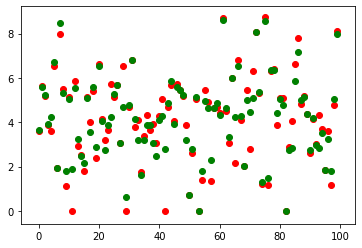

In [113]:
plt.scatter(range(100),ytest[:100],c='r')
plt.scatter(range(100),predicrrf[:100],c='g')

In [105]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error as mse

In [106]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4]
alphas2 = [5e-5,0.0001,0.0002,0.0003,0.0004,0.0008]
e_alphas = [0.0001,0.0002,0.0003,0.0007]
e_l1ratio = [0.8,0.85,0.9,0.95,0.99,1]

In [107]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=123)

In [108]:
lasso = make_pipeline(RobustScaler(),LassoCV(n_alphas=1000,random_state=42,cv=kfolds))

In [109]:
lasso.fit(xtrain, ytrain)

MemoryError: 

In [119]:
predict = lasso.predict(xtest)

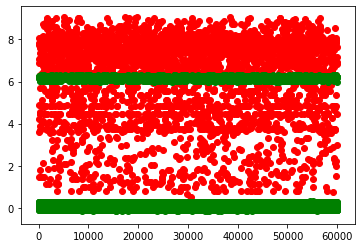

In [120]:
plt.scatter(range(len(ytest)),ytest,c='r')
plt.scatter(range(len(ytest)),predict,c='g')

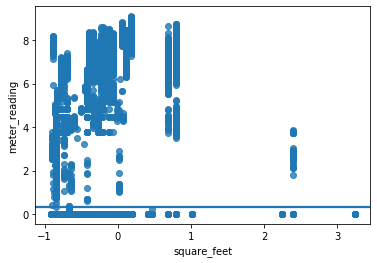

In [121]:
sns.regplot(xtrain['square_feet'],ytrain)

In [122]:
elasticnet = make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e6,alphas=e_alphas,cv=kfolds, random_state=42,l1_ratio=e_l1ratio))

In [123]:
elasticnet.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0007],
                              copy_X=True,
                              cv=KFold(n_splits=5, random_state=123, shuffle=True),
                              eps=0.001, fit_intercept=True,
                              l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1],
                              max_iter=1000000.0, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=42,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=False)

In [124]:
predict = elasticnet.predict(xtest)

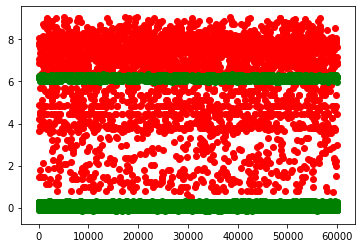

In [125]:
plt.scatter(range(len(ytest)),ytest,c='r')
plt.scatter(range(len(ytest)),predict,c='g')

In [126]:
def cv_rmse(model, X=xtrain):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error', cv=kfolds))
    return(rmse)

In [127]:
y=ytrain

In [128]:
cv_rmse(lasso,xtrain).mean()

0.6548302623218257

In [129]:
svr = make_pipeline(RobustScaler(),SVR(C=20,epsilon=0.008, gamma=0.0003))

In [ ]:
svr.fit(xtrain,ytrain)

In [ ]:
predict = svr.predict(xtest)

In [ ]:
rf = RandomForest()